## Prognosix


[Link to GitHub](https://github.com/unprosaiclabyrinth/PrognosiX)  
[Link to Jupyter Notebook](https://github.com/unprosaiclabyrinth/PrognosiX/blob/main/Prognosix.ipynb)

### Introduction

Chronic Kidney Disease (CKD) is when the kidneys are destroyed over time and do not have full functionality. CKD is known as a silent killer that often goes undiagnosed until its late stages. 

Prognosix goal is to develop a diagnostic tool that can predict the likelihood of CKD by using the [UCI ML Repository dataset](https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease). By analyzing biomarkers and clinical data collected from patients such as their blood pressure, hemoglobin, age, and albumin measurements, we can see patterns and correlations that can be used to classify individuals at-risk for CKD. We aim to support healthcare providers in making a diagnosis which allows for timely interventions and a reduction in complications. 

### Summary

#### Data

We started by looking at the dataset in UCI ML Repository dataset. Upon downloading, we encountered some issues with the .arff file. So we searched on the web to see if the same dataset was available in CSV format, and someone converted the same dataset into CSV in Kaggle, so we used that for processing. The data has about 400 rows/entries and 25 columns/features. Overall, the dataset has 11 numerical and 14 categorical columns.

Urinary and blood biomarkers such as **serum creatinine**, **albumin**, **specific gravity**, **hemoglobin**, **red blood cell counts**, and **packed cell volume** are strong indicators in detecting whether a patient has CKD or not.

#### ML Analyses

For first analysis, we used supervised binary classification to predict whether a patient has Chronic Kidney Disease (CKD). Serum creatinine, albumin, hemoglobin, and red blood cell counts consistently emerged as strong predictors of CKD, as identified through EDA and confirmed across multiple model trainings. In contrast, packed cell volume and specific gravity showed weaker predictive power. For second analysis, we used Gradient-Boosted Decision Trees with SHAP Explainability. Although the test performance was moderate (Test AUROC: 0.447, 95 % CI: 0.338 – 0.558), SHAP analysis effectively highlighted key biomarkers such as serum creatinine (sc), albumin (al), blood urea (bu), and hemoglobin (hemo), along with subtle feature interactions.

#### Visualizations

All the hypotheses were made, and why we wanted to investigate those hypotheses mentioned for each visualization in the visualization section.

### Exploratory Data Analysis
Cindy Rocha

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

We tried downloading the data from the UCI ML Repository, but the .arff file with the data had several issues. However, someone had already converted this data into .csv in Kaggle.
I decided to use the kaggle data due to convenience. I also did check for any discrepencies.

[Stack Overflow post](https://stackoverflow.com/questions/62653514/open-an-arff-file-with-scipy-io/66939746#66939746)

In [8]:
df = pd.read_csv("chronic_kidney_disease.csv")

# dropping the redundant id feature
df = df.drop('id', axis=1)

df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [9]:
df.shape

(400, 25)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [11]:
# pcv, wc, and rc are actually numerical. 
df['pcv'] = pd.to_numeric(df['pcv'], errors='coerce')
df['wc'] = pd.to_numeric(df['wc'], errors='coerce')
df['rc'] = pd.to_numeric(df['rc'], errors='coerce')

# sg, al, su are categorical
categorical_cols = ['sg', 'al', 'su']
df[categorical_cols] = df[categorical_cols].astype('object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    object 
 3   al              354 non-null    object 
 4   su              351 non-null    object 
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             329 non-null    float64
 16  wc              294 non-null    float64
 17  rc              269 non-null    flo

In [13]:
# Checking for duplicated data
df.duplicated().sum()

np.int64(0)

In [14]:
# unique values per feature
df.nunique()

age                76
bp                 10
sg                  5
al                  6
su                  6
rbc                 2
pc                  2
pcc                 2
ba                  2
bgr               146
bu                118
sc                 84
sod                34
pot                40
hemo              115
pcv                42
wc                 89
rc                 45
htn                 2
dm                  5
cad                 3
appet               2
pe                  2
ane                 2
classification      3
dtype: int64

I noticed that data that should only have 2 unique values has more than 2 such as cad, classification, and dm. Upon further inspection in the .csv file, there are trailing spaces in some rows. So, below I remove those spaces:

In [15]:
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)
print(df['classification'].unique())


['ckd' 'notckd']


In [16]:
df.nunique()

age                76
bp                 10
sg                  5
al                  6
su                  6
rbc                 2
pc                  2
pcc                 2
ba                  2
bgr               146
bu                118
sc                 84
sod                34
pot                40
hemo              115
pcv                42
wc                 89
rc                 45
htn                 2
dm                  2
cad                 2
appet               2
pe                  2
ane                 2
classification      2
dtype: int64

Below shows how many values are missing per column. I noticed that a lot of rows were missing information about red blood cells (rbc), red blood cell count (rc), and white blood cell count (wc)...

In [17]:
# Percentage of missing data/rows per feature
df.isnull().sum() / df.shape[0] * 100

age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.75
wc                26.50
rc                32.75
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64

rbc
normal      201
abnormal     47
Name: count, dtype: int64

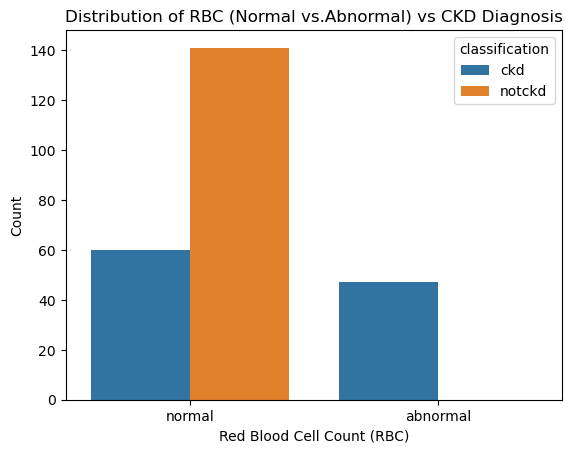

In [18]:
sns.countplot(data=df, x='rbc', hue='classification')
plt.title('Distribution of RBC (Normal vs.Abnormal) vs CKD Diagnosis')
plt.xlabel('Red Blood Cell Count (RBC)')
plt.ylabel('Count')
df['rbc'].value_counts()

So, we do not have any data for when it is notckd and it is abnormal. Maybe it is a strong indicator of rbc being abnormal showing that it is ckd.

rbc
normal      353
abnormal     47
Name: count, dtype: int64

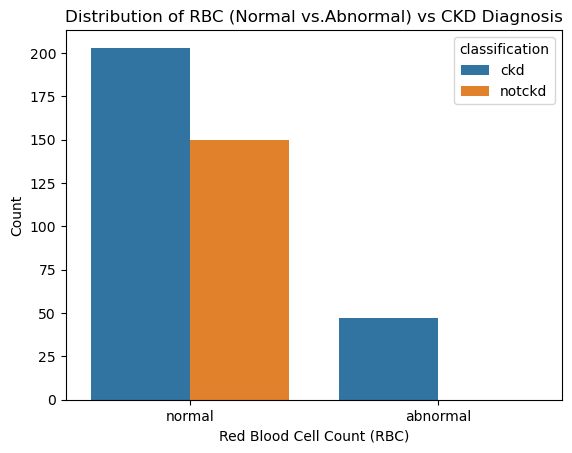

In [19]:
# imputation - replacing missing values for categorical data using the mode for RBC
df['rbc'] = df['rbc'].fillna(df['rbc'].mode()[0])

sns.countplot(data=df, x='rbc', hue='classification')
plt.title('Distribution of RBC (Normal vs.Abnormal) vs CKD Diagnosis')
plt.xlabel('Red Blood Cell Count (RBC)')
plt.ylabel('Count')
df['rbc'].value_counts()

A lot of people missing the RBC feature are diagnosed with ckd... I think maybe we should discard the rbc feature?

In [20]:
# spiltting cols into numerical and catergorical for later analysis?
numerical_cols = ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']
df_numeric = df[numerical_cols]

categorical_cols = ['sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']
df_categorical = df[categorical_cols]

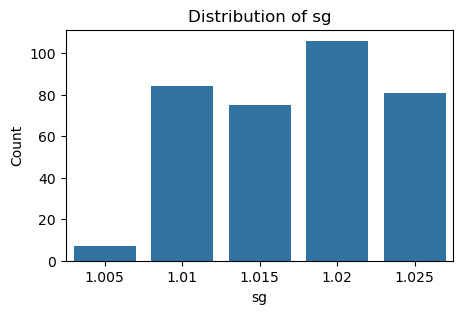

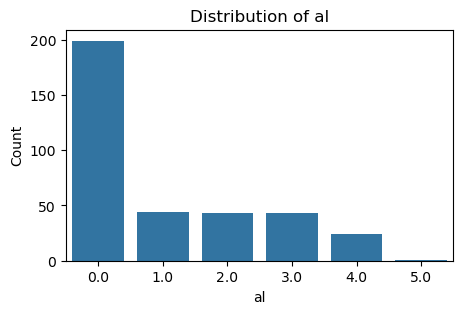

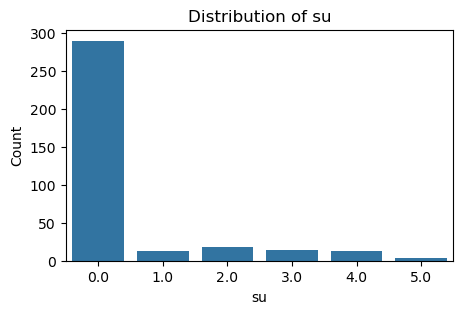

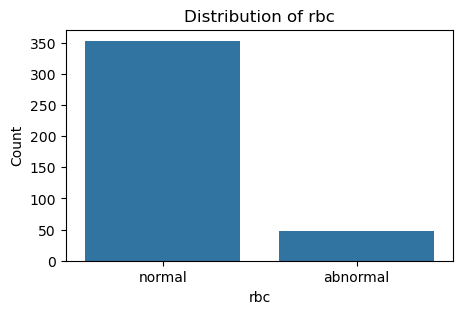

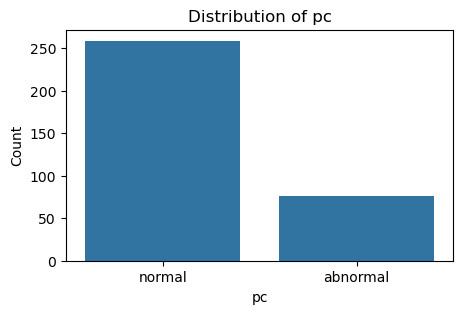

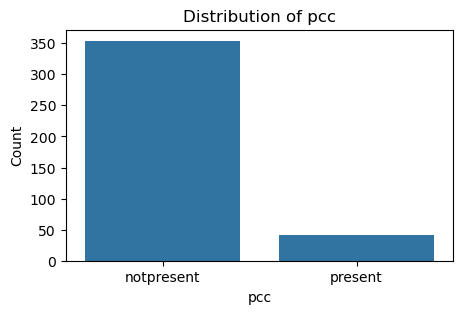

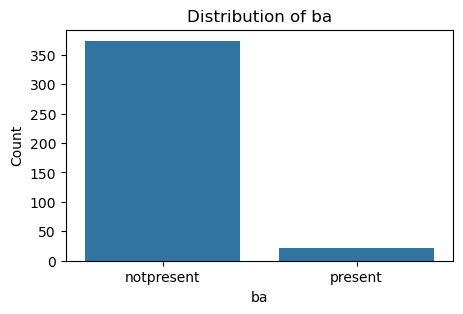

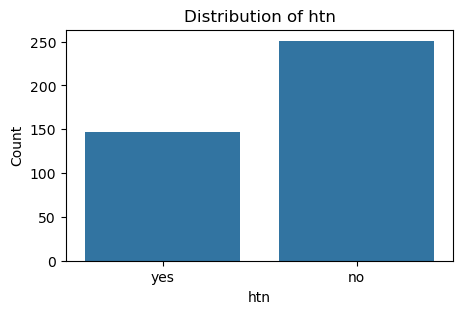

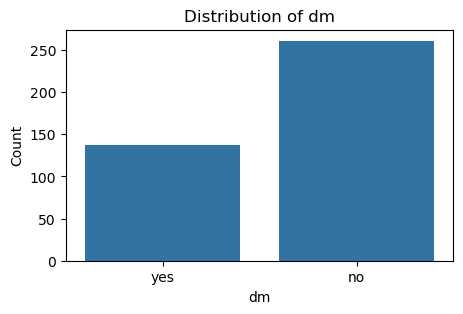

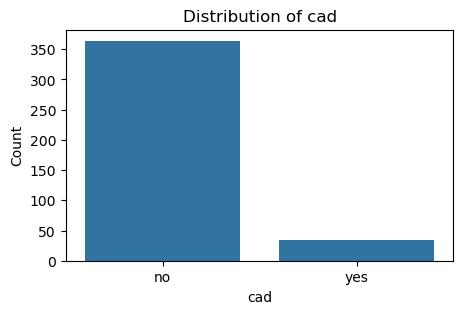

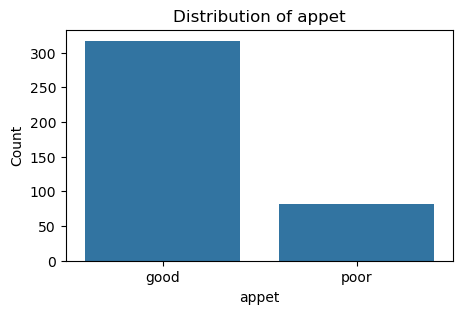

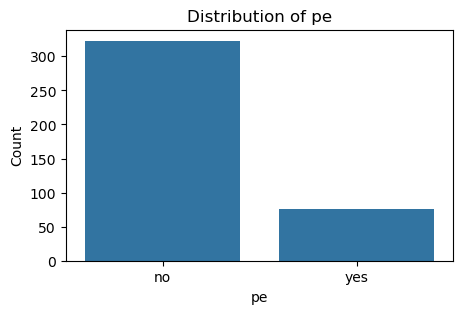

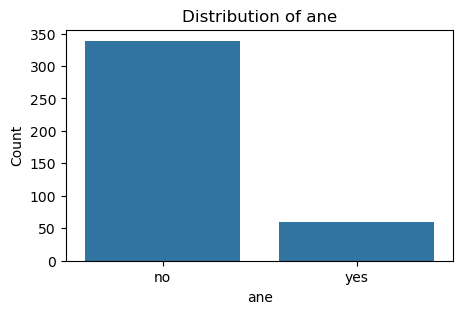

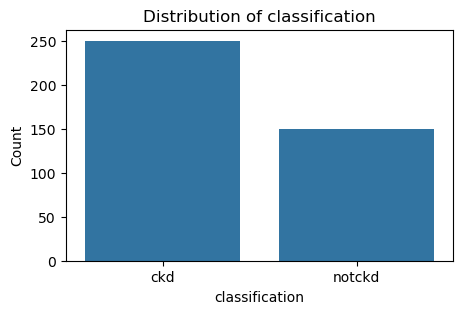

In [21]:
#  distribution of categorical data 
for col in categorical_cols:
    plt.figure(figsize=(5, 3)) 
    sns.countplot(x=df[col], data=df) 
    plt.title(f'Distribution of {col}')
    plt.ylabel('Count')
    plt.show()

In [22]:
# mode imputation on categorical data
df['sg'] = df['sg'].fillna(df['sg'].mode()[0])
df['al'] = df['al'].fillna(df['al'].mode()[0])
df['su'] = df['su'].fillna(df['su'].mode()[0])
df['pc'] = df['pc'].fillna(df['pc'].mode()[0])
df['pcc'] = df['pcc'].fillna(df['pcc'].mode()[0])
df['ba'] = df['ba'].fillna(df['ba'].mode()[0])
df['htn'] = df['htn'].fillna(df['htn'].mode()[0])
df['cad'] = df['cad'].fillna(df['cad'].mode()[0])
df['appet'] = df['appet'].fillna(df['appet'].mode()[0])
df['htn'] = df['htn'].fillna(df['htn'].mode()[0])
df['cad'] = df['cad'].fillna(df['cad'].mode()[0])
df['dm'] = df['dm'].fillna(df['dm'].mode()[0])
df['appet'] = df['appet'].fillna(df['appet'].mode()[0])
df['pe'] = df['pe'].fillna(df['pe'].mode()[0])
df['ane'] = df['ane'].fillna(df['ane'].mode()[0])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   rbc             400 non-null    object 
 6   pc              400 non-null    object 
 7   pcc             400 non-null    object 
 8   ba              400 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             329 non-null    float64
 16  wc              294 non-null    float64
 17  rc              269 non-null    flo

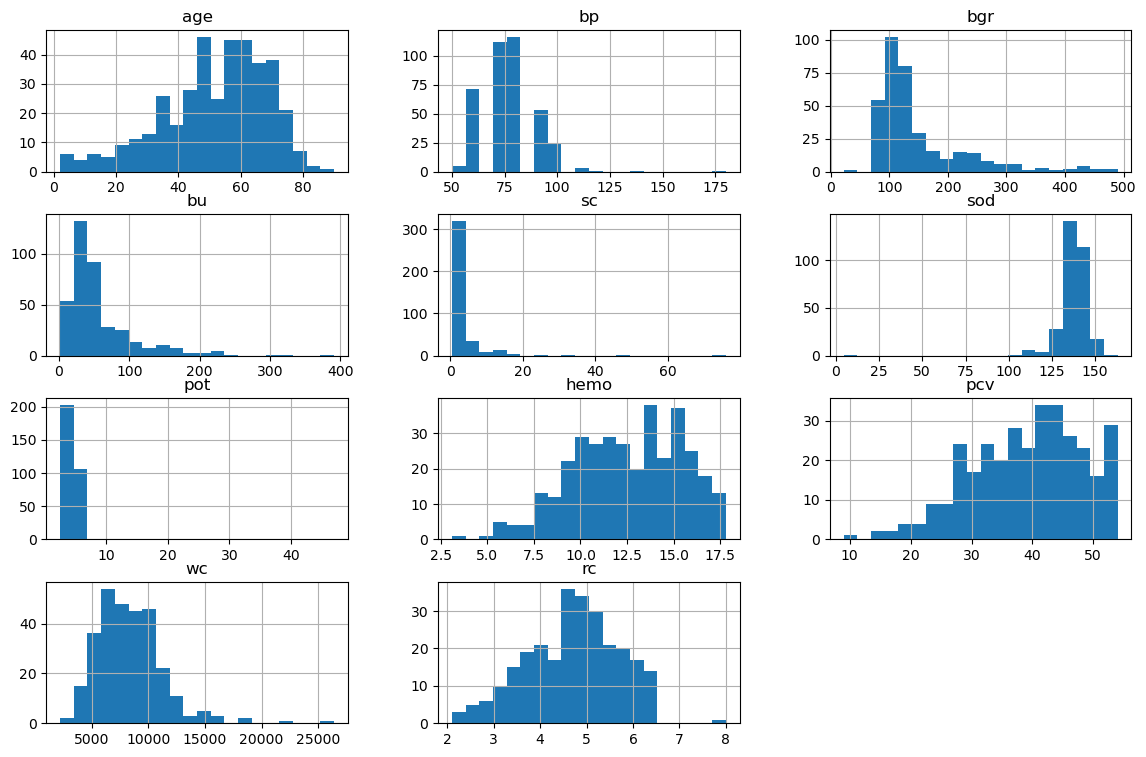

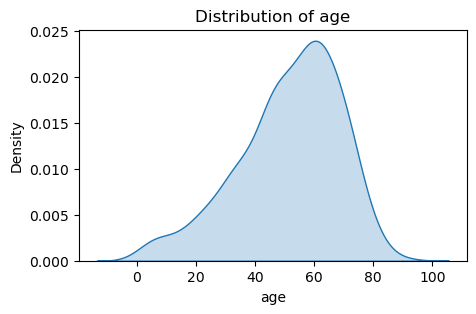

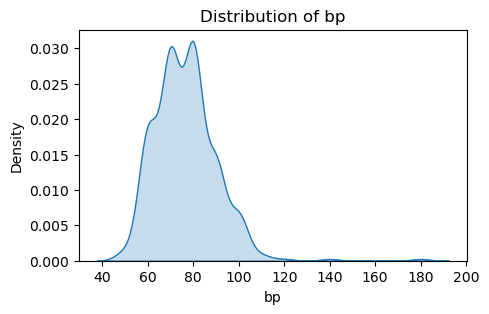

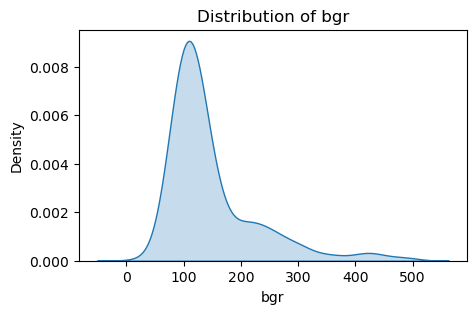

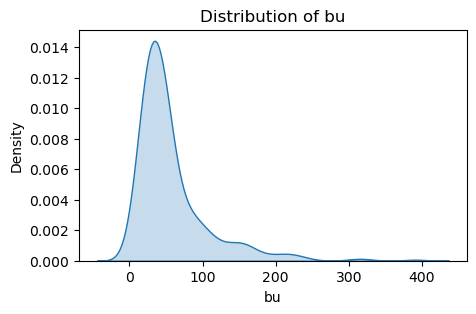

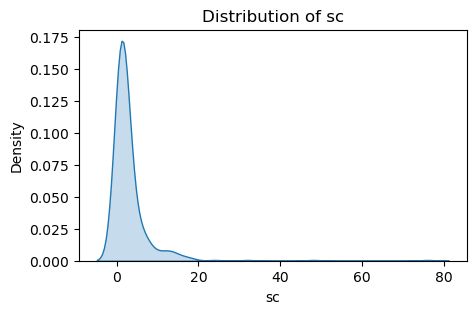

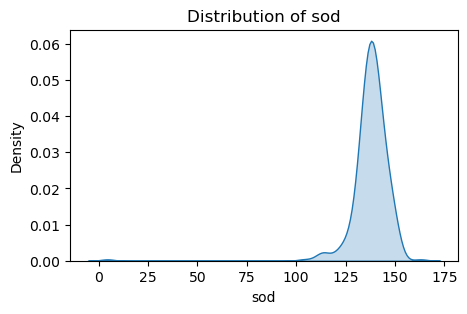

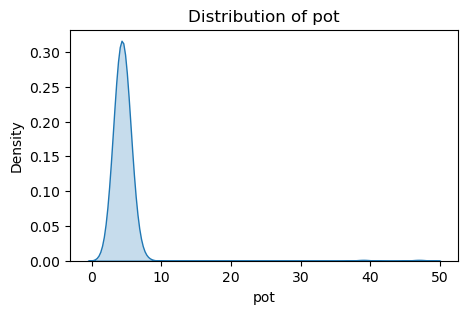

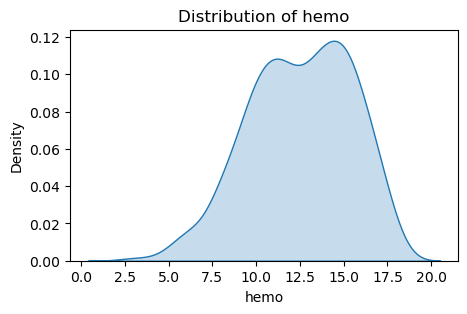

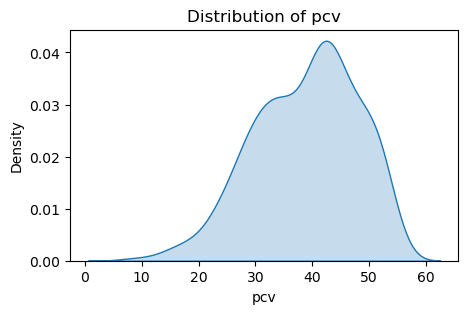

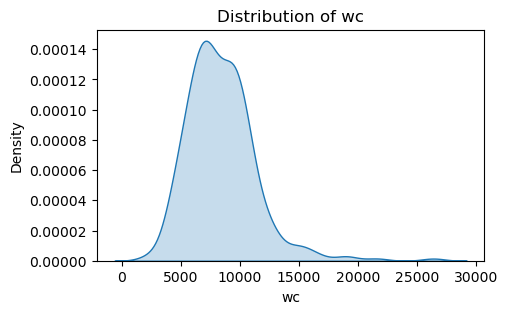

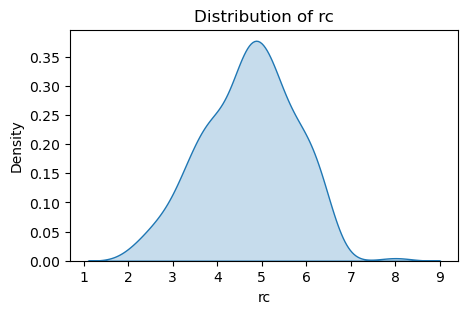

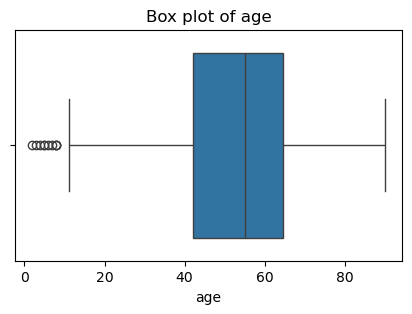

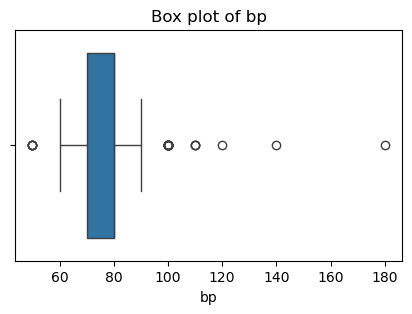

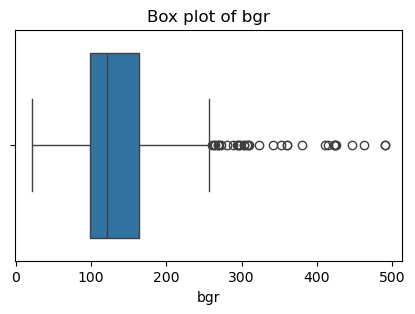

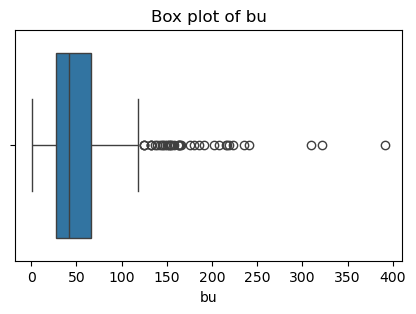

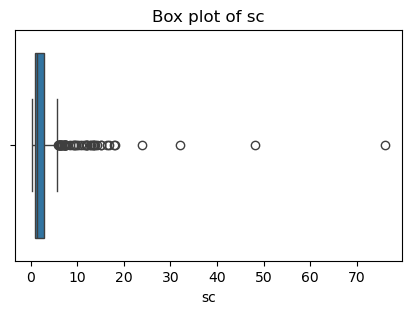

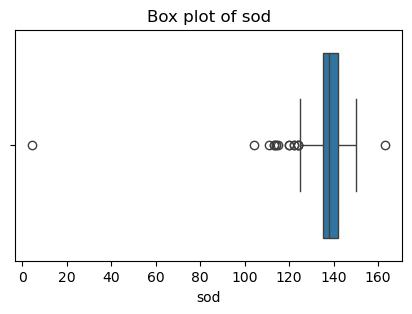

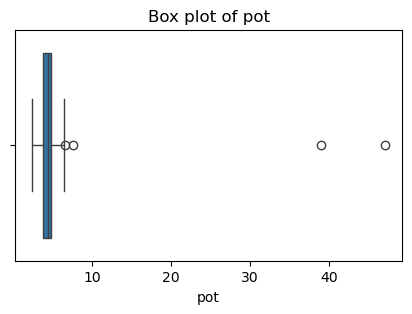

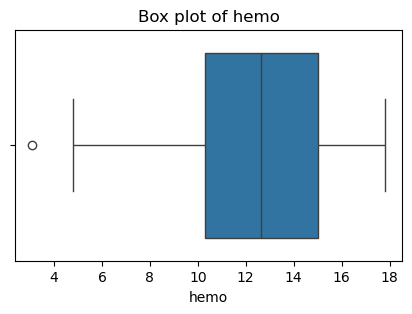

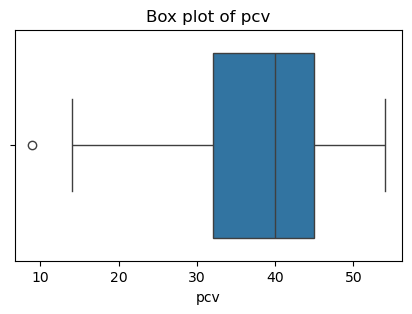

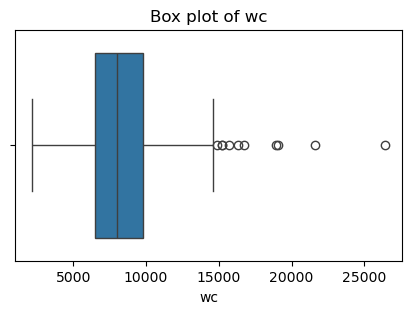

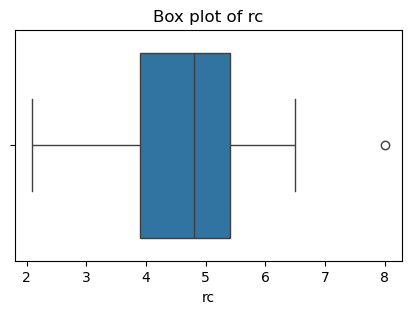

In [24]:
# numerical feature distributions

# histograms
df[numerical_cols].hist(bins=20, figsize=(14, 9))
plt.show()

# KDE
for col in numerical_cols:
    plt.figure(figsize=(5, 3))
    sns.kdeplot(df[col], fill=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Box for visible outliers
for col in numerical_cols:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()

In [25]:
skewness = df[numerical_cols].skew()
print(skewness)

age     -0.668259
bp       1.605429
bgr      2.010773
bu       2.634374
sc       7.509538
sod     -6.996569
pot     11.582956
hemo    -0.335095
pcv     -0.433679
wc       1.621589
rc      -0.183329
dtype: float64


In [26]:
# Imputation on numerical data either mean/median depending on outliers
# Impute with mean when almost symmetric data, impute with median when skewed data
# I'm not sure if this is the right approach either... I have a feeling it's not...
# Also, I think if someone is reading this,
# I would like to drop any data that has more than 70% feature info missing, like row 31 in the csv

cols = ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']

for col in cols:
    df[col] = df[col].fillna(df[col].mean())

In [27]:
# descriptive statistics
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.483376,76.469072,1.017712,0.90000,0.395000,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,16.974966,13.476298,0.005434,1.31313,1.040038,74.782634,49.285887,5.617490,9.204273,2.819783,2.716171,8.151081,2523.219976,0.840314
min,2.000000,50.000000,1.005000,0.00000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.015000,0.00000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,10.875000,34.000000,6975.000000,4.500000
50%,54.000000,78.234536,1.020000,0.00000,0.000000,126.000000,44.000000,1.400000,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
75%,64.000000,80.000000,1.020000,2.00000,0.000000,150.000000,61.750000,3.072454,141.000000,4.800000,14.625000,44.000000,9400.000000,5.100000
max,90.000000,180.000000,1.025000,5.00000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [28]:
df.describe(include='object')

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
count,400,400,400,400,400,400,400,400,400,400,400
unique,2,2,2,2,2,2,2,2,2,2,2
top,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
freq,353,324,358,378,253,263,366,318,324,340,250


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   rbc             400 non-null    object 
 6   pc              400 non-null    object 
 7   pcc             400 non-null    object 
 8   ba              400 non-null    object 
 9   bgr             400 non-null    float64
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             400 non-null    float64
 16  wc              400 non-null    float64
 17  rc              400 non-null    flo

In [30]:
df_numeric.corr()

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
age,1.000000,0.159480,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928,-0.242119,0.118339,-0.268896
bp,0.159480,1.000000,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540,-0.326319,0.029753,-0.261936
bgr,0.244992,0.160193,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189,-0.301385,0.150015,-0.281541
bu,0.196985,0.188517,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360,-0.607621,0.050462,-0.579087
sc,0.132531,0.146222,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670,-0.404193,-0.006390,-0.400852
sod,-0.100046,-0.116422,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183,0.376914,0.007277,0.344873
pot,0.058377,0.075151,0.066966,0.357049,0.326107,0.097887,1.000000,-0.133746,-0.163182,-0.105576,-0.158309
hemo,-0.192928,-0.306540,-0.306189,-0.610360,-0.401670,0.365183,-0.133746,1.000000,0.895382,-0.169413,0.798880
pcv,-0.242119,-0.326319,-0.301385,-0.607621,-0.404193,0.376914,-0.163182,0.895382,1.000000,-0.197022,0.791625
wc,0.118339,0.029753,0.150015,0.050462,-0.006390,0.007277,-0.105576,-0.169413,-0.197022,1.000000,-0.158163


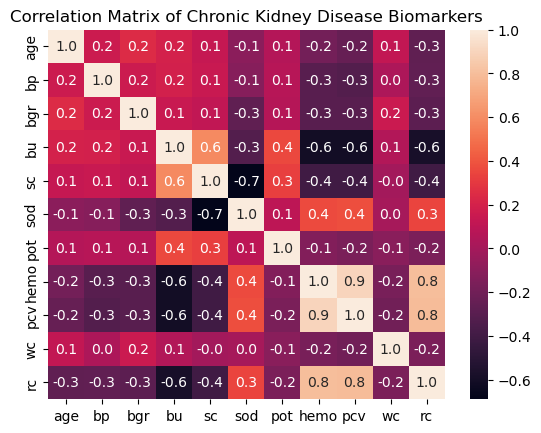

In [74]:
sns.heatmap(df_numeric.corr(), annot=True, fmt=".1f", cmap="rocket")
plt.title("Correlation Matrix of Chronic Kidney Disease Biomarkers")
plt.show()

From the above correlation matrix, we can see that there is a strong positive correlation between the following:
 - hemoglobin: red blood cell count, and packed cell volume

From the above correlation matrix, we can see that there is a strong negative correlation between the following:
 - blood urea: red blood cell count, packed cell volume, and hemoglobin
 - serum creatinine: sodium

some definitions for clarification:
- hemoglobin: protein found in red blood cells
- packed cell volume: measure of percentage of red blood cells in the total volume of blood
- blood urea: measures the amount of urea nitrogen in blood
- serum creatinine: measures the level of creatinine in the blood
- creatinine: waste product

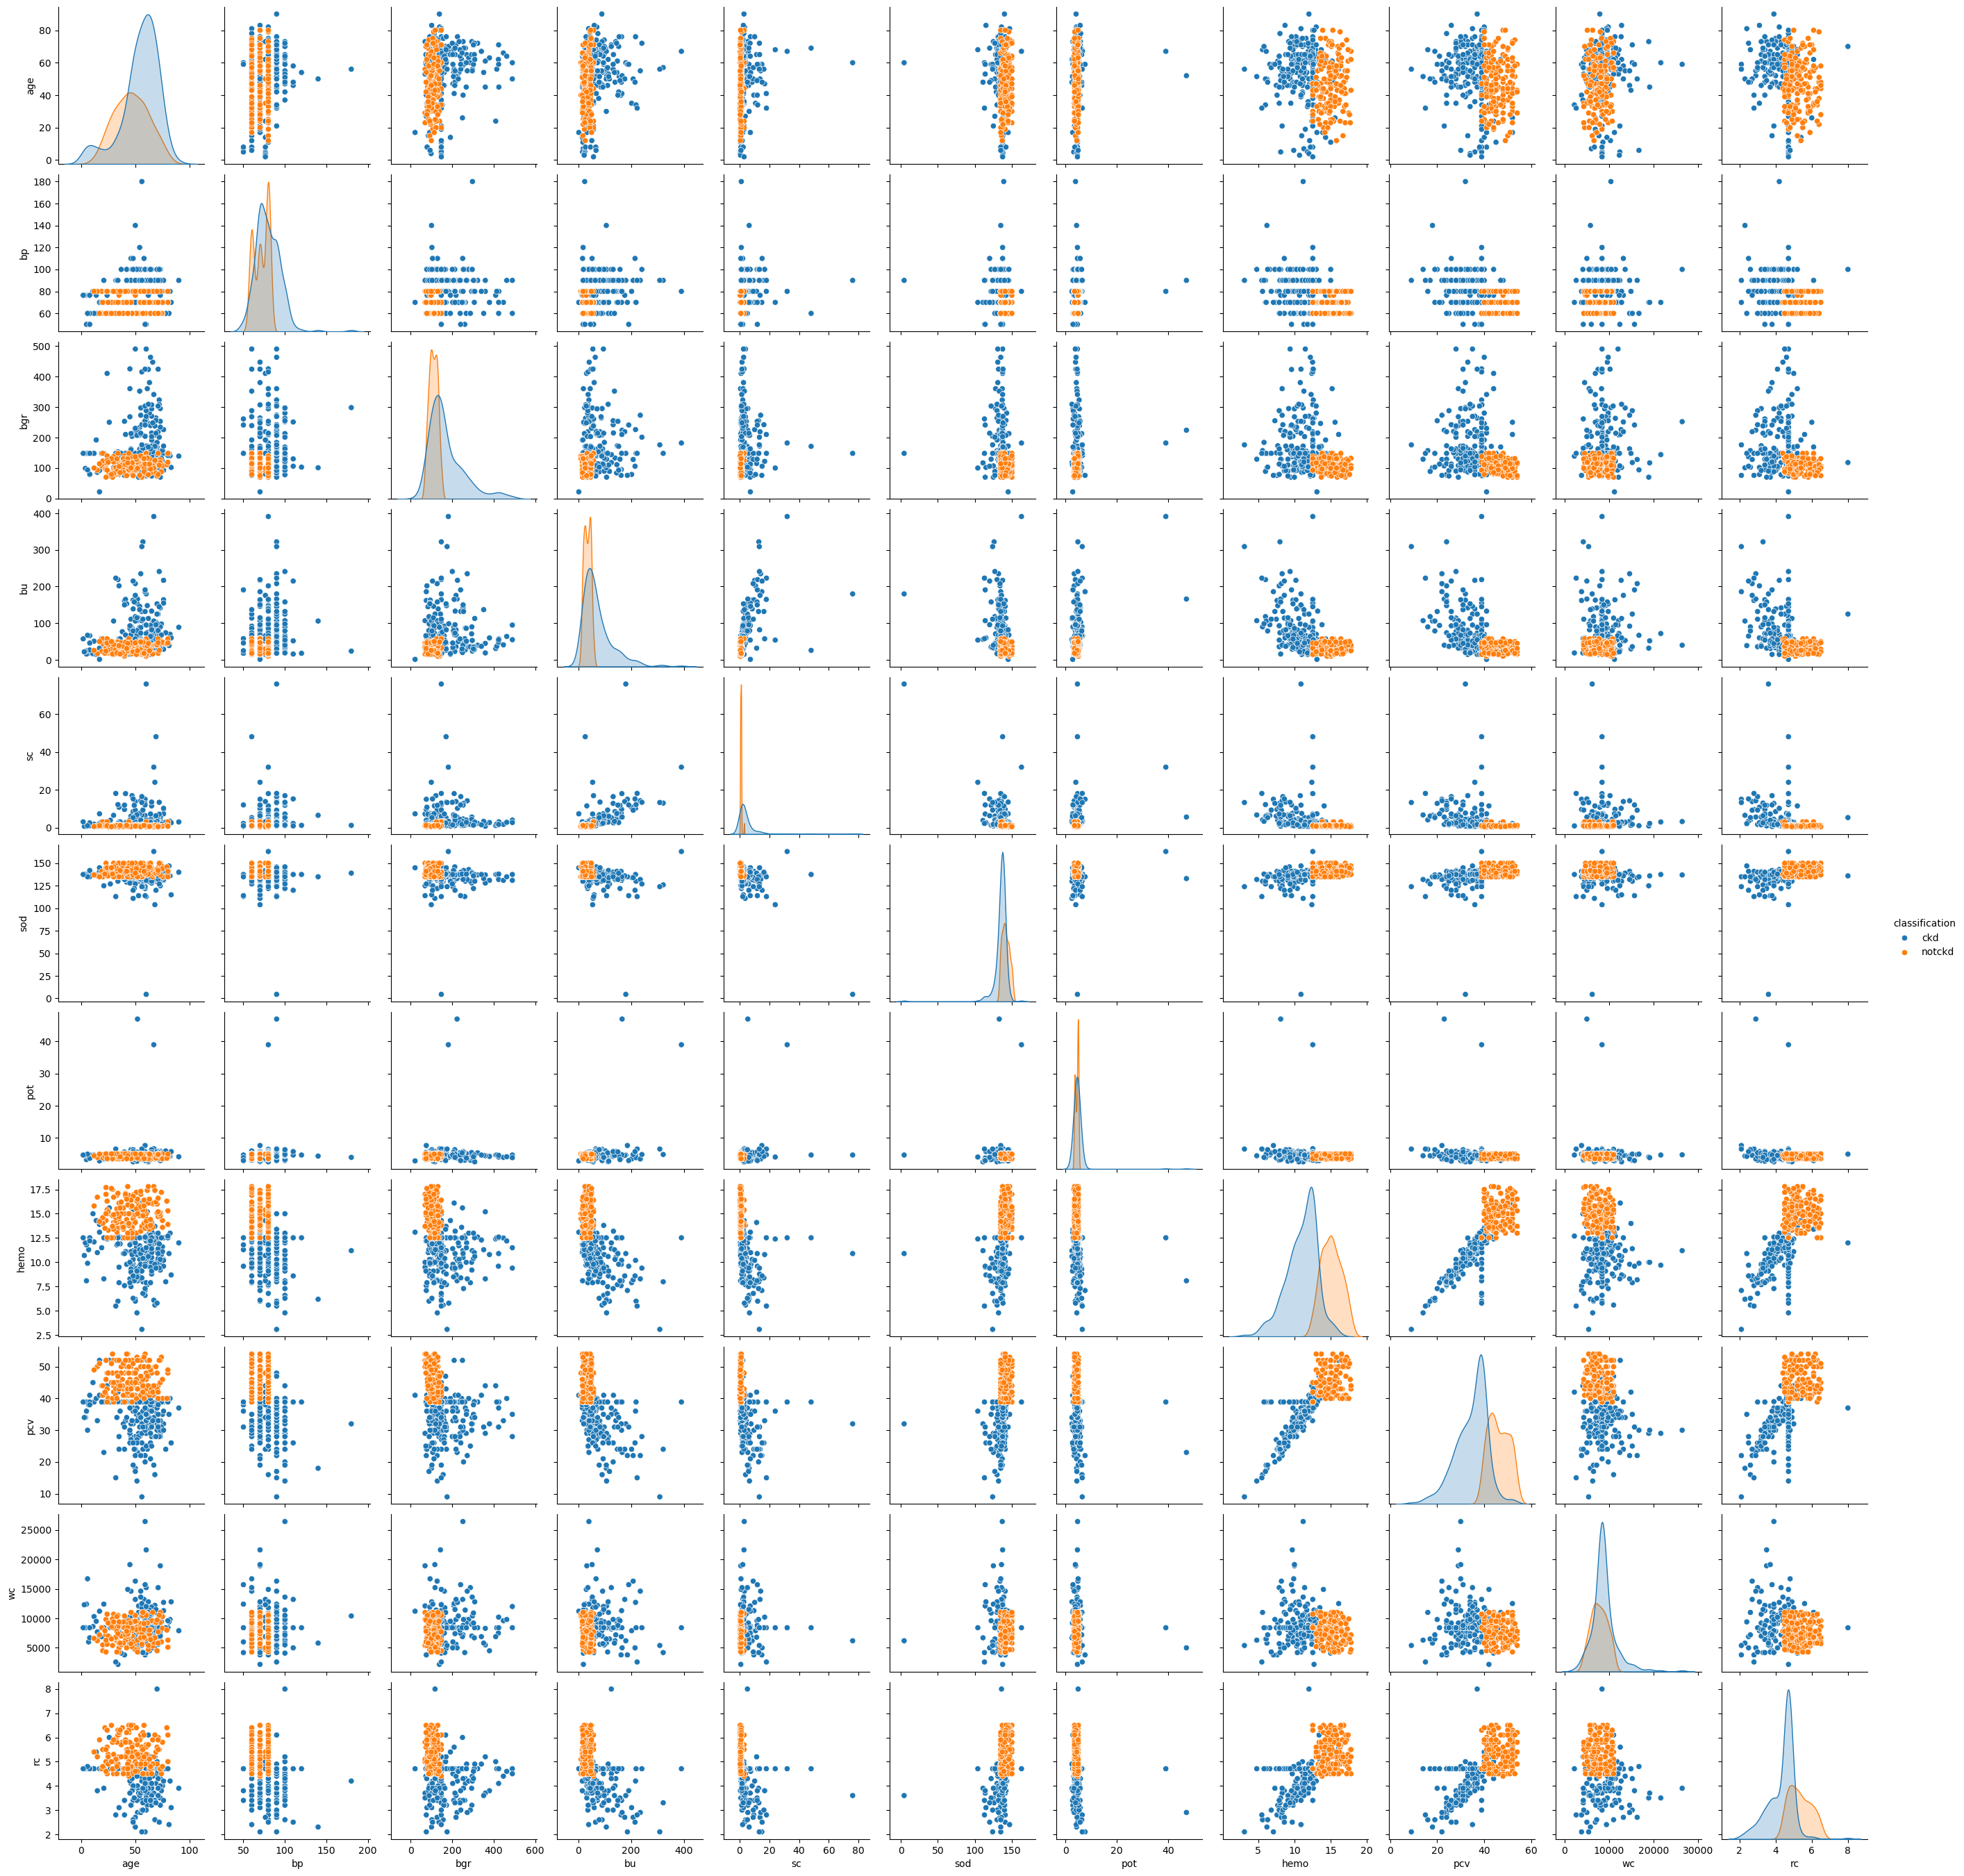

In [32]:
sns.pairplot(df[numerical_cols + ['classification']], hue='classification')
plt.show()

Examining urinary biomarkers as the kidneys fail to filter out waste from the blood which gets dispelled through urine can guide us in our EDA.
Some key urinary biomarkers for CKD in our dataset are albumin and specific gravity.

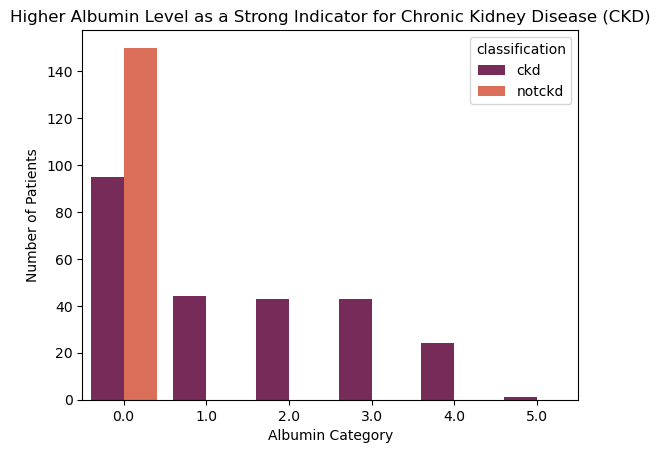

In [73]:
sns.countplot(data=df, x='al', hue='classification', palette="rocket")
plt.title("Higher Albumin Level as a Strong Indicator for Chronic Kidney Disease (CKD)")
plt.xlabel('Albumin Category')
plt.ylabel('Number of Patients')
plt.show()

Anyone outside of level 0 has CKD. Finding albumin in urine is a strong indicator of CKD in this dataset. The significance is that the presence of albumin alone is a valuable early sign of kidney damage and it's a prdecessor to being diagnosed with CKD. However, the absence of albumin alone is not enough avoid a CKD diagnosis as the possibility is still there.

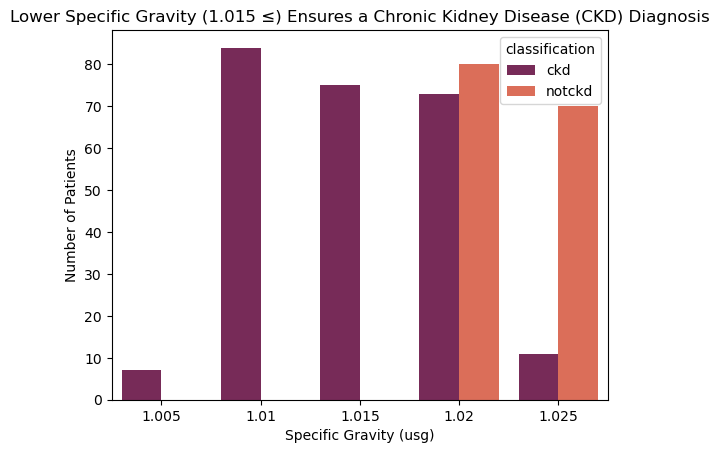

In [72]:
sns.countplot(data=df, x='sg', hue='classification', palette="rocket")
plt.title("Lower Specific Gravity (1.015 ≤) Ensures a Chronic Kidney Disease (CKD) Diagnosis")
plt.xlabel('Specific Gravity (usg)')
plt.ylabel('Number of Patients')
plt.show()

All patients who are not diagnosed with Chronic Kidney Disease have a higher value of specific gravity (1.02, 1.025). However, even patients with CKD have a high specific gravity as well. Having a lower specific gravity measurement of 1.015, 1.01, and 1.005 are indicators of CKD in patients. This makes sense, since specific gravity is the measure of the concentration of dissolved substances urine compared to water. In context of CKD, it shows the kidney's ability to concentrate urine.

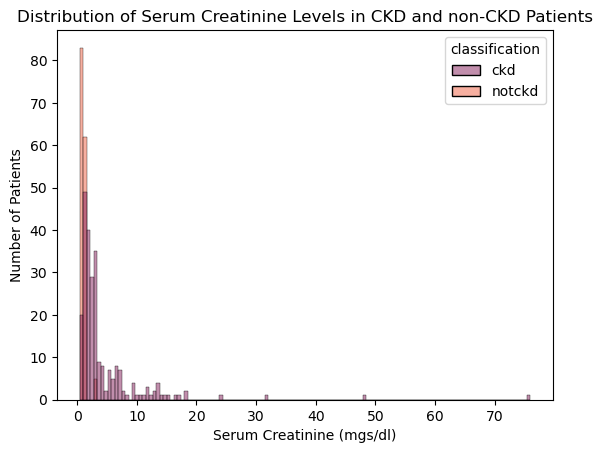

In [71]:
sns.histplot(data=df, x='sc', hue='classification', palette="rocket")
plt.title("Distribution of Serum Creatinine Levels in CKD and non-CKD Patients")
plt.xlabel('Serum Creatinine (mgs/dl)')
plt.ylabel('Number of Patients')
plt.show()

All patients without CKD have low serum creatinine. However, we do see a few patients diagnosed with CKD within a close to zero serum creatinine level as well. Anything over that range, indicates CKD. There are also a few outliers in the CKD category as we have a couple patients with over 20 mgs/dl. Once again, this biomarker alone is not enough to classify patients with/without CKD.

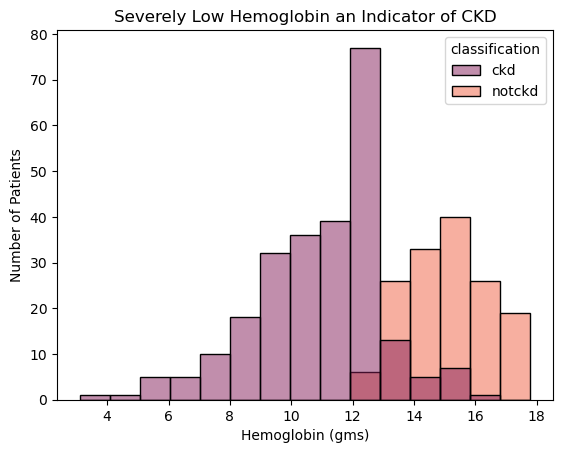

In [70]:
sns.histplot(data=df, x='hemo', hue='classification', palette="rocket")
plt.title("Severely Low Hemoglobin an Indicator of CKD")
plt.xlabel('Hemoglobin (gms)')
plt.ylabel('Number of Patients')
plt.show()

Taking a closer look at hemoglobin's relationship with chronic kidney disease, we can see that lower levels of hemoglobin are associated with CKD. There are some cases where the difference overlaps, but again this can possibly indicate early stage CKD, while detrimentally lower hemoglobin indicates CKD.

Further exploring the pairplots earlier on hemoglobin. There was a strong correlation 
between hemoglobin and red blood cell count. 

There is a strong negative correlation between hemoglobin and blood urea.

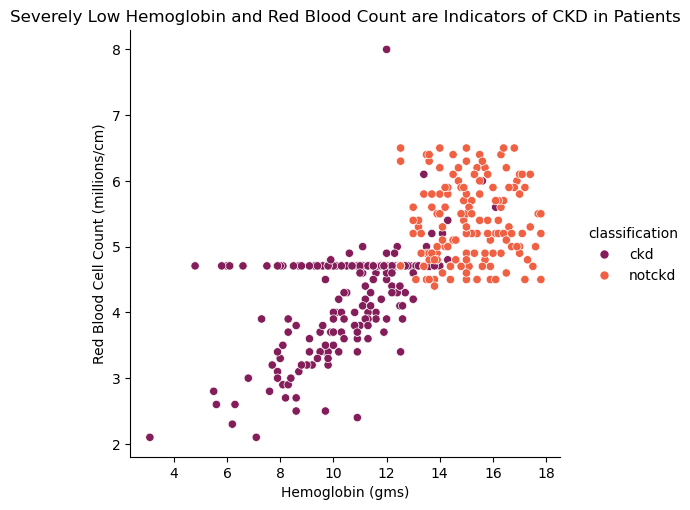

In [77]:
sns.relplot(data=df, x="hemo", y="rc", hue="classification", palette="rocket")
plt.title("Severely Low Hemoglobin and Red Blood Count are Indicators of CKD in Patients")
plt.xlabel('Hemoglobin (gms)')
plt.ylabel('Red Blood Cell Count (millions/cm)')
plt.show()

A higher amout of hemoglobin and a higher amount of red blood cell count shows a patient is less likely to have CKD. However there are some outliers, but a measurement of hemoglobin lower than 12gms and and a red blood cell count lower than 5 are strong indicators of CKD. 

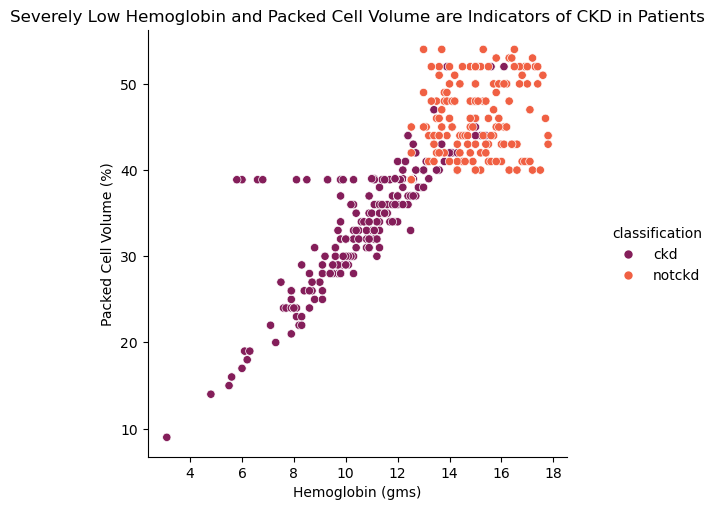

In [78]:
sns.relplot(data=df, x="hemo", y="pcv", hue="classification", palette="rocket")
plt.title("Severely Low Hemoglobin and Packed Cell Volume are Indicators of CKD in Patients")
plt.xlabel('Hemoglobin (gms)')
plt.ylabel('Packed Cell Volume (%)')
plt.show()

Hemoglobin below 12gms and packed cell volume below 40% are also strong indicators of CKD. Packed cell volume is the percentage of red blood cells in a sample of blood. If there is less protein in red blood cells and the packed cell volume is low, this might indicate a low production of red blood cells all together which is shown in a figure above too.

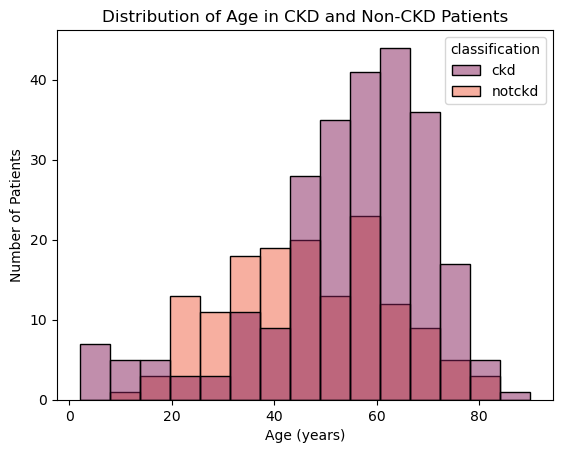

In [76]:
sns.histplot(data=df, x='age', hue='classification', palette ='rocket')
plt.title("Distribution of Age in CKD and Non-CKD Patients")
plt.xlabel('Age (years)')
plt.ylabel('Number of Patients')
plt.show()

Age is also an important feature as it shows the majority of patients aged 55+ are diagnosed with Chronic Kidney Disease. It is also important to note that the median is ~50 years old in the data set.

#### Data Export

Export the preprocessed data.

In [40]:
df.to_csv("ckd_preprocessed.csv", index=False)

#### EDA Conclusion

Urinary and blood biomarkers such as <b>serum creatinine</b>, <b>albumin</b>, <b>specific gravity</b>, <b>hemoglobin</b>, <b>red blood cell counts</b>, and <b>packed cell volume</b> are strong indicators in detecting whether a patient has CKD or not. 